# Analysis Of Advertisement data


# Introduction:-
## Problem:-
- This model predicts whether the user will click on an advertisment or not based off the feature of that user.Using 
  unsupervised learning algorithms (machine learning) and some visualization tools
    - This data set contains the following features:

       - 'Daily Time Spent on Site': consumer time on site in minutes
       - 'Age': cutomer age in years
       - 'Area Income': Avg. Income of geographical area of consumer
       - 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
       - 'Ad Topic Line': Headline of the advertisement
       - 'City': City of consumer
       - 'Male': Whether or not consumer was male
       - 'Country': Country of consumer
       - 'Timestamp': Time at which consumer clicked on Ad or closed window
       - 'Clicked on Ad': 0 or 1 indicated clicking on Ad
       
In this project,  i have worked with the advertising data of a marketing agency to develop a machine learning algorithm that predicts if a particular user will click on an advertisement. The data consists of 10 variables: 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country', Timestamp' and 'Clicked on Ad'.

The main variable we are interested in is 'Clicked on Ad'. This variable can have two possible outcomes: 0 and 1 where 0 refers to the case where a user didn't click the advertisement, while 1 refers to the scenario where a user clicks the advertisement.

Goal is to see if we can use the other 9 variables to accurately predict the value 'Clicked on Ad' variable, also  some exploratory data analysis is done to see how 'Daily Time Spent on Site' in combination with 'Ad Topic Line' affects the user's decision to click on the add.   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

To check whether the user will click on the ad or not
step1
- analysing using:-
    - histogram of age
    - create a joint plot  showing area of income vs age
    - create a joint plot  showing the kde distribution of daily time spent on site  vs age
    - create a joint plot of 'Daily Time Spent on Site'  vs 'Daily Internet Usage'
    - create a pair plot with hue defined by the 'Clicked on Ad' column feature
step2
- train test split,  and train the model using logistic regression
    - split the data into training and testing set
    - train and fit a logistic regression modeland decision tree on training set
    - Predict and Evaluate some values
step3
- get a classification report check the accuracy
  also evaluate the accuracy of a classification using confusion matrix 
- compare which algo is best for the model

 dataset from (https://www.kaggle.com/)

In [2]:
ad_data = pd.read_csv('advertising.csv')

In [3]:
print(ad_data.head)

<bound method NDFrame.head of      Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgenerat

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
print(ad_data.describe)

<bound method NDFrame.describe of      Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgen

# analysing data

<AxesSubplot:ylabel='Frequency'>

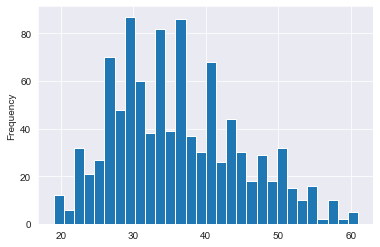

In [6]:
sns.set_style('darkgrid')
ad_data['Age'].plot.hist(bins=30)


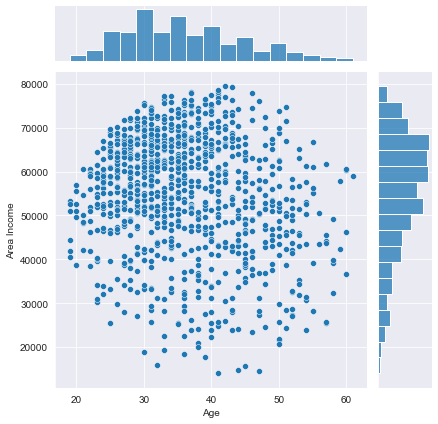

In [7]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)

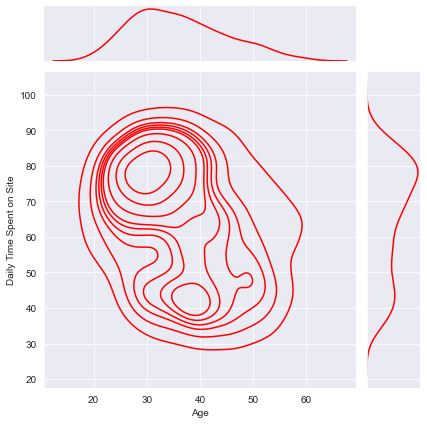

In [8]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde', color='red')

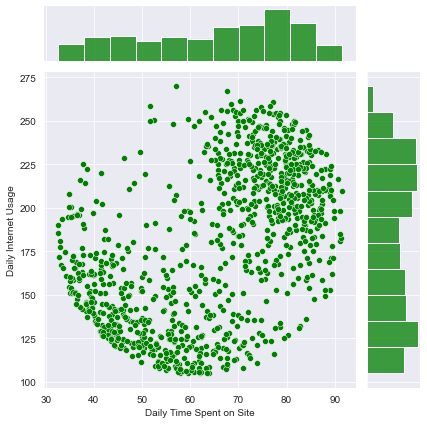

In [9]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, color='green')

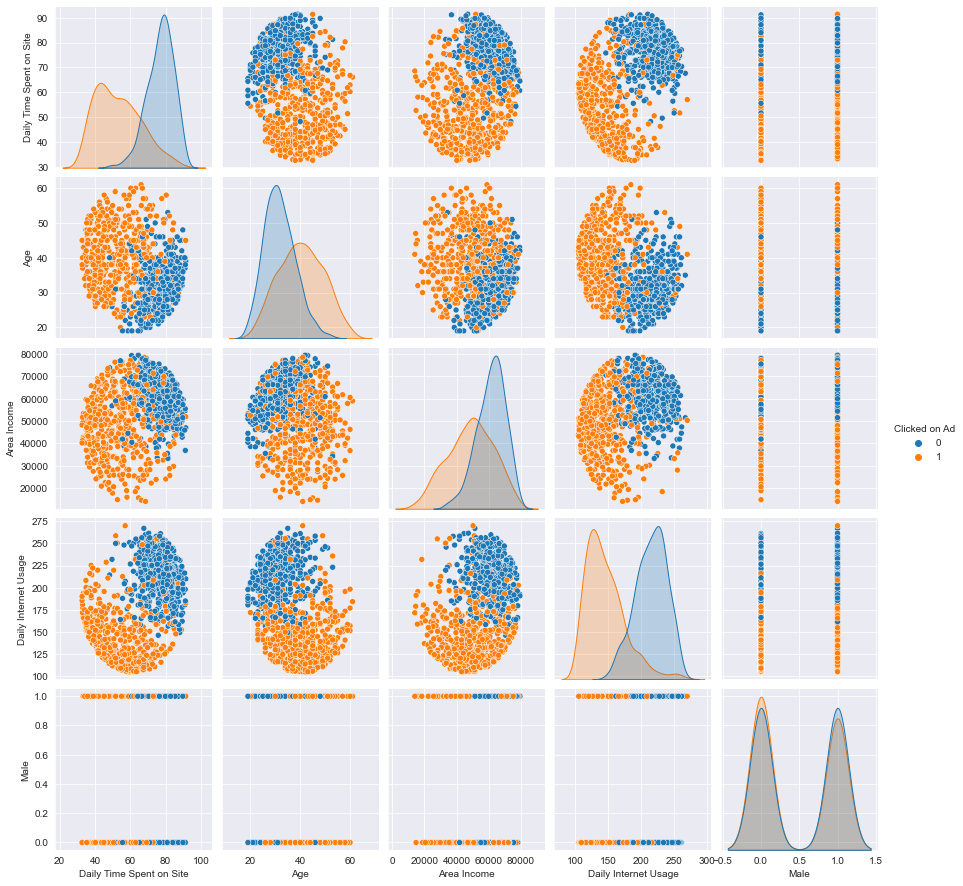

In [10]:
sns.pairplot(data=ad_data, hue='Clicked on Ad')

# logistic regression

In [11]:
from sklearn.model_selection import train_test_split

Dividing dataset into two variables:-
    - X
    - y

In [12]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

# Train Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Logistic Regression
The Logistic Regression model is an algorithm that uses a logistic function to model binary dependent variables. It is a tool for predictive analysis and it is used to explain the relationships between multiple variables. You can find out more about this technique at the following link: <a href="https://en.wikipedia.org/wiki/Logistic_regression">Logistic Regression</a>.

In [14]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

# predict values for testing model

In [15]:
predictions_LR = logmodel.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print("this is the classification report\n", classification_report(y_test, predictions_LR))
print("this is the confusion matrix\n", confusion_matrix(y_test, predictions_LR))

this is the classification report
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

this is the confusion matrix
 [[149   8]
 [ 14 129]]


In [16]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('')

Logistic regression accuracy: 0.9266666666666666



The accuracy of the logistic regression model is 0.926 or 92.6%. As can be observed, the performance of the model is also determined by the confusion matrix. The condition for using this matrix is to be exploited on a data set with known true and false values. You can find additional information on the confusion matrix here: Confusion Matrix.

Our confusion matrix tells us that the total number of accurate predictions is 149 + 129 = 278. On the other hand, the number of incorrect predictions is 14 + 8 = 22. We can be satisfied with the prediction accuracy of our model.

# Decision Trees

The Decision Tree is one of the most commonly used data mining techniques for analysis and modeling. It is used for classification, prediction, estimation, clustering, data description, and visualization. The advantages of Decision Trees, compared to other data mining techniques are simplicity and computation efficiency. Some background on decision trees and how to use them with Scikit-Learn can be found here:<a href="https://stackabuse.com/decision-trees-in-python-with-scikit-learn/"> Decision Trees in Python</a>.

In [17]:
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
predictions_DT = model_2.predict(X_test)

In [18]:
print('Decision tree accuracy:', accuracy_score(predictions_DT, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test,predictions_DT))

Decision tree accuracy: 0.95

Confusion matrix:
[[150   7]
 [  8 135]]


It can be concluded that the Decision Tree model showed better performances in comparison to the Logistic Regression model. The confusion matrix shows us that the 285 predictions have been done correctly and that there are only 15 incorrect predictions. Additionally, Decision Tree accuracy is better by about 2% in comparison to the first regression model.

# Conclusion

The obtained results showed the use value of both machine learning models. The Decision Tree model showed slightly better performance than the Logistic Regression model, but definitely, both models have shown that they can be very successful in solving classification problems.

The prediction results can certainly be changed by a different approach to data analysis. We encourage you to do your analysis from the beginning, to find new dependencies between variables and graphically display them. After that, create a new training set and a new test set. Let the training set contain a larger amount of data than in the article. Fit and evaluate your model. In the end, praise yourself in a comment if you get improved performances.